## Capítulo 2 - Classification

In [2]:
#Carrega os dados de imagens de números escritos a mão
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
#Separa em dado e label
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import matplotlib
import matplotlib.pyplot as plt

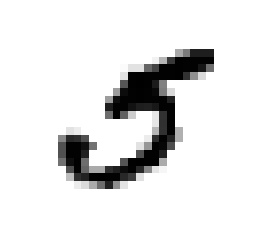

In [6]:
#Pega um digito qualquer e plota a imagem
n = 36000
some_digit = X[n]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
#Verifica o label do digito
y[n]

5.0

In [8]:
#Separa em treino e teste
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#Permuta os dados
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

<h3> Classificação Binária </h3>

In [9]:
#Simplificar em classificação binaria, classe dos 5 e dos não 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
#Importaqndo stocastic gradient descent
from sklearn.linear_model import SGDClassifier

In [11]:
#Treinando o modelo
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
#Testando a predição
n = 6000
print('Classe de {0} eh {1}'.format(n,y_test[n]))
sgd_clf.predict(X_test[n].reshape(1, -1))

Classe de 6000 eh 5.0


array([ True])

<h3><center> IMPLEMENTING CROSS-VALIDATION </center></h3>

In [13]:
#Fazendo k fold com 3-fold, divide o dataset em três conjuntos de 2000 mil samples

#The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio
#of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds,
#and makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct
#predictions.

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.957


C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9621


C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9619


In [14]:
#Mesma coisa que k-fold anterior
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

array([0.957 , 0.9621, 0.9619])

In [15]:
#Classificador burro que classifica todas as imagens como não sendo 5
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9109 , 0.90865, 0.9094 ])

In [16]:
#Faz a mesma coisa que cross_val_score() só que em vez de retornar os score retorna as predições
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

In [17]:
#Pegando a matriz de confusão
#Linha representa a classe atual
#Coluna a classe predita
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53659,   920],
       [ 1460,  3961]], dtype=int64)

<h2>$$precision = \frac{TP}{TP+FP}$$</h2>
<h2>$$recall = \frac{TP}{TP+FN}$$</h2>

<img src="imagens/confusionillustrated.png">

In [18]:
y_pred.shape

(20000,)

In [19]:
#Precision e recall utilizando funções do sklearn
from sklearn.metrics import precision_score, recall_score

print('Precision = {0}'.format(precision_score(y_train_5, y_train_pred)))
print('Recall = {0}'.format(recall_score(y_train_5, y_train_pred)))

Precision = 0.8115140340094243
Recall = 0.7306769968640472


<img src="imagens/F1.png">

In [20]:
#Calculo do F1 Score, uma média harmonica do precision e recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.768976897689769

In [21]:
#Verificar o score de uma decisão, se score for menor que thresolhd é classificado negativo, cc positivo
# O SGDClassifier usa threshold de 0
#Existe um trade-off entre precision e recall, quanto maior o limiar (threshold) maior o precision e menor o recall e vice-versa
n = 0
threshold = 0
y_scores = sgd_clf.decision_function(X_train[n].reshape(1, -1))
print("Score da amostra {0} eh {1}".format(n,y_scores))
y_some_digit_pred = (y_scores > threshold)
print("A classificação da amostra com threshold = {0} eh {1}".format(threshold,y_some_digit_pred))

Score da amostra 0 eh [-223960.70130025]
A classificação da amostra com threshold = 0 eh [False]


In [22]:
#Pegando o score de todo o dataset de treino
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

In [23]:
#Calcula o precision e recall para toda as possibilidades
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

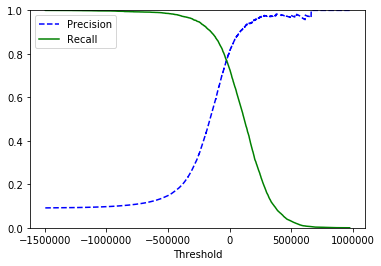

In [24]:
#Plotando a curva de precision por recall, ajuda a decidir qual threshold usar
#Nota: Dependendo da aplicação pode ser necessário ter um precision bem maior que recall ou virce versa
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

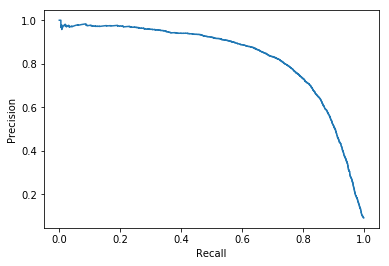

In [25]:
#Outra forma de selecionar o tradeoff entre precision e recall é plotar o precision diretamente contra o recall 
plt.plot(recalls[:-1], precisions[:-1], label="Precision X Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

Em torno de 60% do recall o precision começa a descer muito, talvez seja um bom limiar para a escolha. Porém depende do projeto!

In [26]:
#Então foi decidido que teria um precision de 90%, ou seja um threshold de 70000, vamos checar o precision e recall
#para essa escolha
threshold = 70000
y_train_pred_90 = (y_scores > threshold)
print("precision para threshold de {0} eh {1} ".format(threshold,precision_score(y_train_5, y_train_pred_90)))
print("recall para threshold de {0} eh {1} ".format(threshold,recall_score(y_train_5, y_train_pred_90)))

precision para threshold de 70000 eh 0.8885832187070152 
recall para threshold de 70000 eh 0.5958310274857037 


Uma precisão muito alta não é muiot útil se recall for muito baixo 

TIP: If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

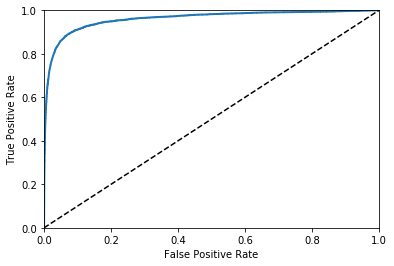

In [27]:
#The receiver operating characteristic (ROC)
#It is very similar to the precision/recall curve, but instead of plotting precision versus recall, 
#the ROC curve plots the true positive rate (another name for recall) against the false positive rate.

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC
equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to
compute the ROC AUC:

In [28]:
#Função do scikit para calcular á área debaixo da curva, um classificador perfeito tem área = 1
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9610881885885276

TIP: ROC é similar curva precision/recall, para decidir qual usar prefira PR quando a classe positiva é rara ou
     quando se tem mais preocupação com falso positivo que o falso negativo, e ROC em caso contrário

<h4> Testando com o Random Forest </h4>

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [30]:
#Random forest não retorna score e sim probabilidades, usar probabilidades como score
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


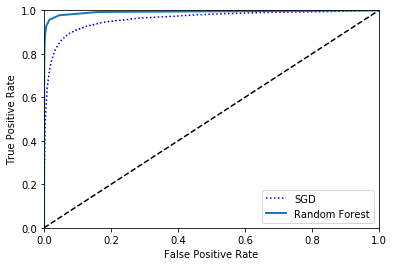

In [31]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [32]:
roc_auc_score(y_train_5, y_scores_forest)

0.9926486591487795

O resultado para o Random Forest ficou muito melhor que o SGD! :)

<h3> Classificação multiclasse </h3>

In [33]:
#Scikit-Learn detecta quando se esta usando um classificador binário para multiplas classes e automaticamente executa 
#a estratégia Um-contra-Todos (exceto para SVM que executa Um-contra-Um)
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [34]:
#Testando a predição, que automaticamente seleciona o maior score
sgd_clf.predict(X_train[1].reshape(1,-1))

array([8.])

In [35]:
#Para ver todos os scores dos classificadores 
some_digit_scores = sgd_clf.decision_function(X_train[1].reshape(1,-1))
some_digit_scores

array([[-483990.1722749 , -468499.88871427, -212136.95667003,
        -154405.05470606,  -87068.67102026, -193019.20315573,
        -528686.77079156, -528817.49896759,  177338.29199779,
        -250541.86480198]])

In [36]:
#Pegando o maior score
np.argmax(some_digit_scores)

8

In [37]:
#Ver as classes do classificador
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [38]:
#Para forçar o classificador a usar outra estrategia
#Mudar o Um-contra-Todos para Um-contra-Um
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [39]:
ovo_clf.predict(X_train[1].reshape(1,-1))

array([8.])

In [40]:
some_digit_scores = ovo_clf.decision_function(X_train[1].reshape(1,-1))
some_digit_scores

array([[0.6725733 , 0.76312389, 8.17487597, 6.16227697, 6.09746036,
        3.04631119, 0.66810492, 3.82437109, 9.5       , 6.09090231]])

In [41]:
#Treinar o random forest não precisa executar OvA ou OvO porque pode diretamente classificar multiplas classes
forest_clf.fit(X_train, y_train)
forest_clf.predict(X_train[1].reshape(1,-1))

array([8.])

In [42]:
#Pegando a probabilidade de cada classe
forest_clf.predict_proba(X_train[1].reshape(1,-1))

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [43]:
#Para avaliar os classificadores usando cross validation
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

array([0.81658668, 0.88099405, 0.86863029])

In [44]:
#Agora testar escalonando a entrada
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

array([0.90911818, 0.91014551, 0.9106366 ])

O resultado melhorou bastante após escalonar o conjunto de entrada!

<h3> Análise de Erro </h3>

In [45]:
#Começar pela matriz de confusão
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Miniconda3\envs\carlos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Pro

array([[5739,    2,   17,    9,   11,   47,   45,    8,   41,    4],
       [   1, 6480,   47,   26,    6,   46,    7,   10,  109,   10],
       [  53,   40, 5332,  115,   85,   30,   90,   51,  150,   12],
       [  53,   40,  137, 5334,    3,  237,   33,   59,  138,   97],
       [  22,   29,   36,   11, 5384,    8,   50,   31,   84,  187],
       [  76,   45,   33,  181,   72, 4607,  113,   30,  173,   91],
       [  39,   24,   47,    2,   41,   93, 5619,    5,   48,    0],
       [  22,   26,   72,   32,   55,   10,    4, 5820,   19,  205],
       [  49,  153,   74,  149,   12,  155,   61,   28, 5027,  143],
       [  47,   35,   29,   84,  164,   37,    2,  208,   87, 5256]],
      dtype=int64)

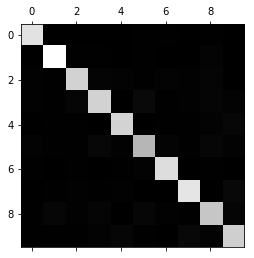

In [46]:
#Mais conveniente olhar imagem representativa
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Essa matriz de confusão parece muito boa, a diagonal toda branca mostra maioria das classificações corretas. 
Porem uma classe pode haver mais amostras que outras e para verificar o erro vamos dividir o número  da matriz de confusão pelo número de imagens de cada classe

In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Agora vamos preencher a diagonal com zeros para manter apenas os erros e plotar o resultado

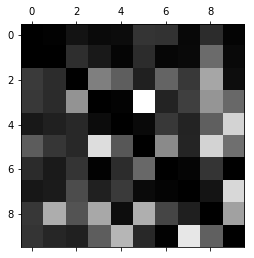

In [48]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Lembrando que as linha é a classe e a coluna é classsificação.

As colunas para as classes 8 e 9 estão bastante claras, indicando que várias imagens foram classificadas incorretamente, de maneira similar as linhas 8 e 9, mostrando que essas classes são facilmente confundiveis com outros digitos.

Por outro lado a linha 1 está bastante escura, indicando que maioria da classe 1 foi classificada corretamente (algumas foram confundidas com 8)

Nota: O erro não é perfeitamente simétrico, existem mais 5s classificados como 8s do que o reverso.

Analisando a matriz de confusão dá insights de onde pode ser necessário haver melhorias, se esforçar mais em melhorar a 
classificação do 8 e 9, e fazer engenharia de feature.

Analisando erros individuais pode ser uma boa maneira de ver onde o classificador esta falhando, porém requer mais 
tempo e é mais dificíl de visualizar. Vamos ver alguns exemplos de 3s e 5s

<img src="imagens/exemplos3e5.png">

<h3><center> Conclusão sobre SGD neste caso de uso </center></h3>

Nos dois blocos da esquerda são mostradas as imagens classificadas como 3s e na direita como 5s. Alguns digitos classificados errados podem confundir até os huamanos, fazendo sentido, já outros não dá para entender porque foram classificados errados.

Uma das conclusões e que o SGD é um modelo de classificação linear, e tudo que ele faz é atribuir um peso por classe para cada pixel, e quando uma imagem nova chega ele apenas soma os pesos de intesidade dos pixels para pegar um score para cada classe, então desde que 3s e 5s se diferenciam apenas por poucos pixels, esse modelo facilmente ira confundi-los.

A principal diferença entre 3s e 5s é a posição da linha pequena que junta a linha do topo com arco de baixo. Se você escrever um 3 com a junção afastada um pouco para esquerda, o classificador pode confundir com um 5, e vice-versa. Em outras palavras o classificador é bastante sensivel a deslocamente e rotação de imagem. Então uma estratégia de pré-processamento para reduzir a confusão entre 3 e 5 pode ser garantir que a imagem esteja bem centralizada e não rotacionada. Isso provavelmente irá reduzir o erro também.

<h3> Classificação multi-index </h3>

In [50]:
from sklearn.neighbors import KNeighborsClassifier

#Cria um multiindex com amostras ímpar ou par e números maiores igual a 7
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
y_train[1]

8.0

In [56]:
knn_clf.predict(X_train[1].reshape(1,-1))

array([[ True, False]])

In [ ]:
#Calcular o F1 score com multi-index, calcula o F1 para cada index e depois tira a média 
#Se quiser dar um peso diferente para cada index usar average="weighted"
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

Multioutput classication

In [ ]:
#Acrescentando ruído em uma imagem
noise = rnd.randint(0, 100, (len(X_train), 784))
noise = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
#Fazer com classificador aprende a tirar ruído da imagem
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

In [ ]:
plot_digit(clean_digit)